# Plot phonon band

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

feig=open('LWN.525.freq')
ymin=-5
ymax=20

dline=20 # vertical line intervals


l=feig.readline()
nbnd=int(l.split(',')[0].split('=')[1])
nks=int(l.split(',')[1].split('=')[1].split('/')[0])

eig=np.zeros((nks,nbnd),dtype=float)
for i in range(nks):
    l=feig.readline()
    count=0
    for j in range(nbnd//10+1):
        l=feig.readline()
        for k in range(len(l.split())):
            eig[i][count]=l.split()[k]
            count=count+1
            
feig.close()


p1=plt.subplot(111)

F=plt.gcf()
#F.set_size_inches([5,5])
lw=1 # line width

plt.xlim([0,nks-1]) # 201 points
plt.ylim([ymin,ymax])
#plt.xlabel(r'$k (\AA^{-1})$',fontsize=16)
plt.ylabel(r' $E$ (eV) ',fontsize=16)


for i in range(nbnd):
    line1=plt.plot( eig[:,i],color='r',linewidth=lw ) 

vline=dline
while vline<nks-1:
    plt.axvline(x=vline, ymin=ymin, ymax=ymax,linewidth=lw,color='black')
    vline=vline+dline

# plt.xticks( np.arange(0,140,20), (r'${\Gamma}$', 'X', 'M', r'${\Gamma}$', 'Z',
#            'R','A','Z','X','R','M','A') )

plt.savefig('phononband.pdf',dpi=300)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'LWN.525.freq'

In [ ]:
# Plot band structure 

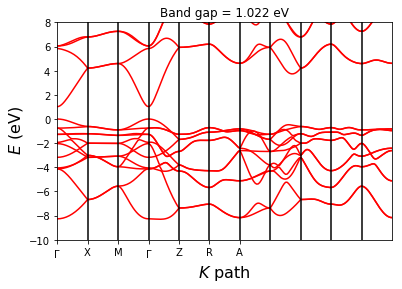

In [10]:
import numpy as np
import matplotlib.pyplot as plt

feig=open('bands.dat')
ymin=-10
ymax=8
nband=26 # this is the valence band number, for insulators only
dline=20 # vertical line intervals

l=feig.readline()
nbnd=int(l.split(',')[0].split('=')[1])
nks=int(l.split(',')[1].split('=')[1].split('/')[0])

eig=np.zeros((nks,nbnd),dtype=float)
for i in range(nks):
    l=feig.readline()
    count=0
    for j in range(nbnd//10+1):
        l=feig.readline()
        for k in range(len(l.split())):
            eig[i][count]=l.split()[k]
            count=count+1
            
feig.close()

p1=plt.subplot(111)

F=plt.gcf()
lw=1.5 # line width

plt.xlim([0,nks-1]) # 201 points
plt.ylim([ymin,ymax])
plt.xlabel(r'$K$ path',fontsize=16)
plt.ylabel(r' $E$ (eV) ',fontsize=16)

eig_vbm=max(eig[:,nband-1])
eig_cbm=min(eig[:,nband])
Gap=eig_cbm-eig_vbm

plt.title("Band gap = "+str(Gap)+" eV")  # for insulators only
for i in range(nbnd):
    line1=plt.plot( eig[:,i]-eig_vbm,color='r',linewidth=lw ) 

vline=dline
while vline<nks-1:
    plt.axvline(x=vline, ymin=ymin, ymax=ymax,linewidth=lw,color='black')
    vline=vline+dline

plt.xticks( np.arange(0,140,20), (r'${\Gamma}$', 'X', 'M', r'${\Gamma}$', 'Z',
           'R','A','Z','X','R','M','A') )

plt.savefig('bands.pdf',dpi=300)
